# Lesson 9 - Model Optimization and Validation

### Activity 1. Train-Test Split & Cross-Validation

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Load data
X, y = load_iris(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Simple validation
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Test Accuracy (train-test split):", model.score(X_test, y_test))

# Cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average CV Accuracy:", np.mean(scores))



Test Accuracy (train-test split): 0.9555555555555556
Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average CV Accuracy: 0.9733333333333334


### Activity 2.  Hyperparameter Tuning: Grid Search vs. Random Search

In [2]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Try SVC with different values
params_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
params_random = {'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf']}

# Grid search
grid = GridSearchCV(SVC(), param_grid=params_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Parameters (Grid):", grid.best_params_)

# Random search (fewer tries)
random = RandomizedSearchCV(SVC(), param_distributions=params_random, n_iter=5, cv=3)
random.fit(X_train, y_train)
print("Best Parameters (Random):", random.best_params_)


Best Parameters (Grid): {'C': 1, 'kernel': 'linear'}
Best Parameters (Random): {'C': np.float64(5.597643221122306), 'kernel': 'linear'}


### Activity 3. Avoiding Overfitting and Underfitting

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Try different tree depths
for depth in [1, 3, 5, 10]:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Depth {depth} → Accuracy: {acc:.2f}")


Depth 1 → Accuracy: 0.62
Depth 3 → Accuracy: 0.91
Depth 5 → Accuracy: 0.91
Depth 10 → Accuracy: 0.91


### Activity 4.  Model Interpretability

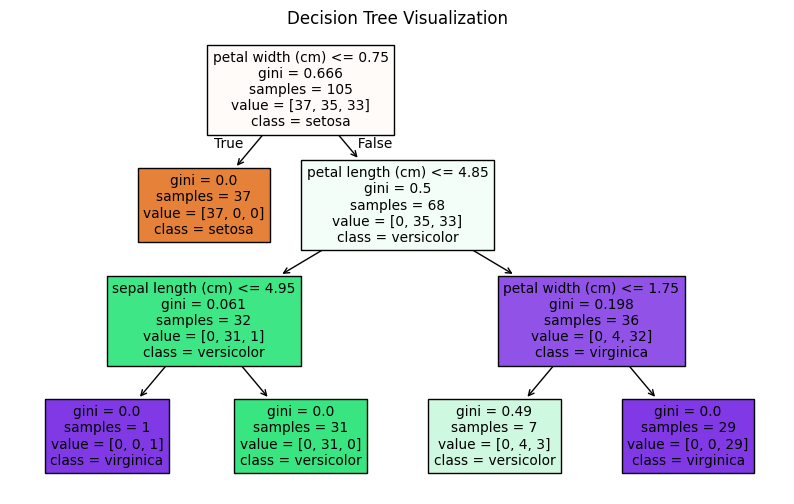

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plot_tree(tree, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.title("Decision Tree Visualization")
plt.show()
